# Entregável 4 de Visão Computacional e Robótica - PARTE 1


**Entrega até 27/09**


**Atenção:** o grupo de 3 ou 4 pessoas desta atividade deve se manter fixo até a entrega do projeto.


Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento


Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

Ouça a explicacão do professor sobre rastreamento e deteção

In [143]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import biblioteca

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca)

# PARTE 1


Você deve detectar se há uma situação de perigo ou não perigo para as vacas.

Perigo
<img src="img/perigo.jpg" width=50%></img>

Não perigo
<img src="img/nao_perigo.jpg" width=50%></img>



#### Orientações

É uma situação de perigo quando: 
* Há mais lobos do que vacas
* As vacas estão contidas na bounding box dos lobos, conforme as figuras

Considere que toda detecção de `dog`, `horse`  e `sheep` também será de lobos.



Baixe o vídeo [ cow_wolf.mp4 neste endereço](https://github.com/Insper/robot20/blob/master/media/cow_wolf.mp4)


In [154]:
import biblioteca_cow

if (sys.version_info > (3, 0)):
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca_cow) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca_cow)

## Carregar MobileNet

Siga os exemplos dado em aula para carregar a MobileNet no arquivo biblioteca_cow.py

Modifique a função `load_mobilenet` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para carregar a MobileNet.

Modifique a função `detect` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para fazer executar a MobileNet em uma imagem.

In [155]:
img = cv2.imread("cow_wolf/cow_wolf01.png")

# Classes
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"]

# Carregar Rede
net = biblioteca_cow.load_mobilenet()

# Detectar
CONFIDENCE = 0.7
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

saida, resultados = biblioteca_cow.detect(net, img, CONFIDENCE, COLORS, CLASSES)

print(resultados)

# Saida Esperada:
# [INFO] computing object detections...
# [INFO] cow: 99.06%
# [INFO] horse: 94.41%
# [INFO] horse: 93.70%
# [('cow', 99.0637481212616, (379, 131), (560, 251)), ('horse', 94.41149830818176, (53, 103), (297, 286)), ('horse', 93.70213747024536, (626, 103), (860, 285))]

[INFO] computing object detections...
[INFO] cow: 99.06%
[INFO] horse: 94.41%
[INFO] horse: 93.70%
[('cow', 99.0637481212616, (379, 131), (560, 251)), ('horse', 94.41149830818176, (53, 103), (297, 286)), ('horse', 93.70213747024536, (626, 103), (860, 285))]


## Regiao de Perigo

Modifique a função `separar_caixa_entre_animais` do arquivo [biblioteca_cow.py](biblioteca_cow.py) utilizando a saida da MobileNet para definir um caixa azul sobre cada vaca e uma caixa vermelha unindo ambos os lobos.

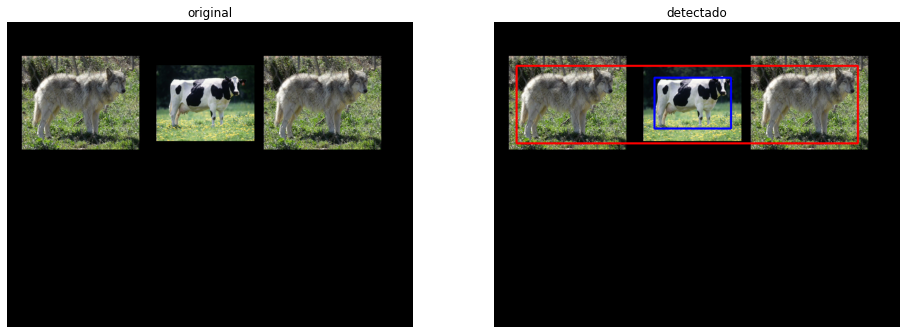

In [156]:
saida, animais = biblioteca_cow.separar_caixa_entre_animais(img, resultados)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('detectado')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Caixa vermelha sobre todos os lobos e uma caixa azul em cada vaca

## Descubra se a vaca esta em perigo
Modifique a função `checar_perigo` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para passar por cada vaca e modifique a função `calcula_iou` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para calcular se existe intersecção entre as caixas.

Escreva sobre cada vaca se ela esta ou não em perigo.
Vermelho para perigo, se não, azul.

Dica: IoU (Intersection over Union): https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/

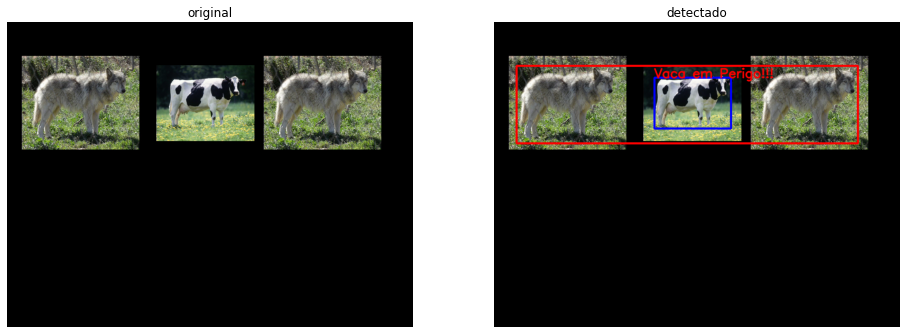

In [158]:
biblioteca_cow.checar_perigo(saida, animais)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('detectado')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Vaca esta em perigo (em vermlho) para a imagem cow_wolf01.png

# Final: Adicionar no video

Modifique o arquivo [cow_wolf.py](cow_wolf.py) para identificar se as vacas estao em perigo no video [cow_wolf.mp4]